# Testing loading and instantiation of workflows

In [1]:
import cwlBrowser as c
import workflow
import requests
import yaml as y 
from IPython.display import SVG, display


#file = open("lobSTR.cwl", 'rb')
#lobSTR0 = y.safe_load(file)
#print (lobSTR0["steps"])
lobSTR1 = c.load("lobSTR.cwl")
metrics = c.load("mixed_library_metrics.cwl")
another = c.load("https://github.com/alexbarrera/GGR-cwl/blob/master/v1.0/ATAC-seq_pipeline/03-map-se-blacklist-removal.cwl", 
                         link=True)
genomics = c.load("https://github.com/hamid58b/cancer-genomics-workflow/blob/master/varscan/varscan.cwl",
                         link=True)
mine = c.load("https://github.com/seanleken/workflowtest/blob/master/workflows/simple-workflow.cwl", link=True)
rrna = c.load("rRNA_selection.cwl")

metrics.printSteps()
lobSTR1.printSteps()
lobSTR1.printInputs()
another.printOutputs()
another.printSteps()
genomics.printOutputs()
mine.printOutputs()
rrna.printSteps()



------------------------------------------------
mixed_library_metrics.cwl STEPS
-------------------------------------------------
STEP Name: picard_collectmultiplemetrics
-----------------------------------------------
picard_collectmultiplemetrics INPUTS:
INPUT Name: DB_SNP Source: WORKFLOW
INPUT Name: INPUT Source: WORKFLOW
INPUT Name: REFERENCE_SEQUENCE Source: WORKFLOW

picard_collectmultiplemetrics OUTPUTS:
OUTPUT Name: alignment_summary_metrics
OUTPUT Name: bait_bias_detail_metrics
OUTPUT Name: bait_bias_summary_metrics
OUTPUT Name: base_distribution_by_cycle_metrics
OUTPUT Name: gc_bias_detail_metrics
OUTPUT Name: gc_bias_summary_metrics
OUTPUT Name: insert_size_metrics
OUTPUT Name: pre_adapter_detail_metrics
OUTPUT Name: pre_adapter_summary_metrics
OUTPUT Name: quality_by_cycle_metrics
OUTPUT Name: quality_distribution_metrics
OUTPUT Name: quality_yield_metrics


-------------------------------------------------
STEP Name: picard_collectmultiplemetrics_to_sqlite
--------------

### Testing and loading ID type workflow

In [2]:
import cwlBrowser as c
link1 = "https://github.com/NCI-GDC/gdc-dnaseq-cwl/blob/3fa737f9162bbfbdbc243a3b1ff7c8e110875eba/workflows/mirnaseq/mixed_library_metrics.cwl"
link2 = "https://github.com/hamid58b/cancer-genomics-workflow/blob/master/varscan/varscan.cwl"
#print (link1)
varcan = c.load(link2, link=True)
metric = c.load(link1, link=True)
#print (link2)
#some = "master/ddd.cwl"
#some.find("master")


# Testing numeric comparison of workflows

In [3]:
import cwlBrowser as c

lobSTR1 = c.load("lobSTR.cwl")
metrics = c.load("mixed_library_metrics.cwl")
another = c.loadWithLink("https://github.com/alexbarrera/GGR-cwl/blob/master/v1.0/ATAC-seq_pipeline/03-map-se-blacklist-removal.cwl")
genomics = c.loadWithLink("https://github.com/hamid58b/cancer-genomics-workflow/blob/master/varscan/varscan.cwl")
mine = c.loadWithLink("https://github.com/seanleken/workflowtest/blob/master/workflows/simple-workflow.cwl")

c.compareNoOfInputs(another, genomics)
c.compareNoOfOutputs(mine, lobSTR1)
c.compareNoOfSteps(metrics, another)

-------------------------------------
--------- inputs comparison------------
-------------------------------------
v1.0/ATAC-seq_pipeline/03-map-se-blacklist-removal.cwl| no. of inputs: 7
varscan/varscan.cwl| no. of inputs: 4
Difference: 3
-------------------------------------


-------------------------------------
--------- outputs comparison------------
-------------------------------------
workflows/simple-workflow.cwl| no. of outputs: 3
lobSTR.cwl| no. of outputs: 4
Difference: 1
-------------------------------------


-------------------------------------
--------- steps comparison------------
-------------------------------------
mixed_library_metrics.cwl| no. of steps: 13
v1.0/ATAC-seq_pipeline/03-map-se-blacklist-removal.cwl| no. of steps: 26
Difference: 13
-------------------------------------




# Testing display of workflow in graph form

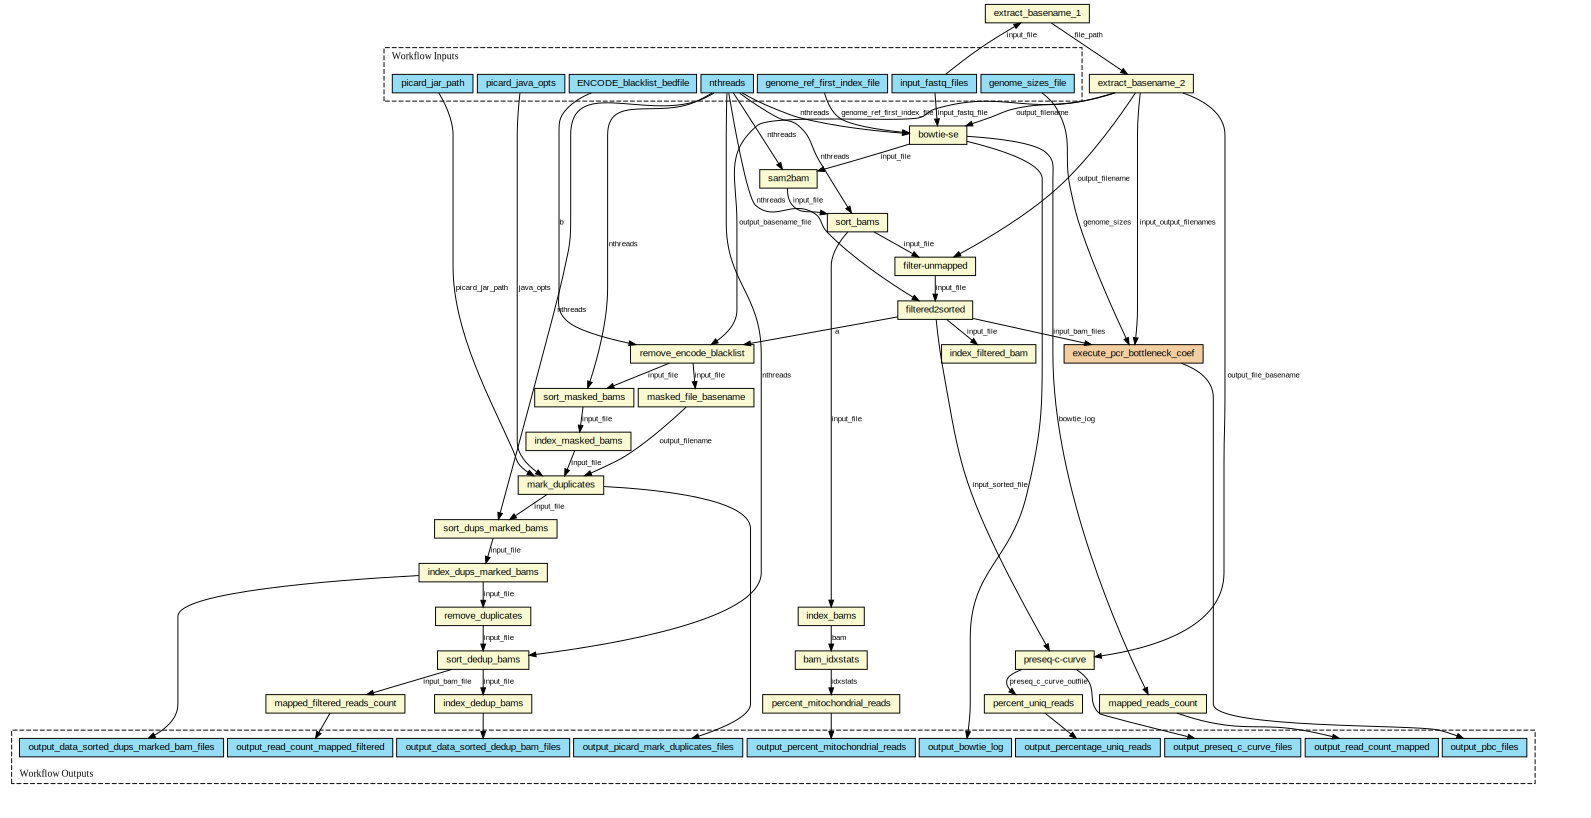

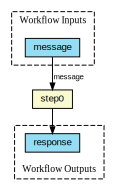

In [4]:
import cwlBrowser as c
import workflow
import requests
import yaml as y 
from IPython.display import SVG, display
c.displayGraphSVG("https://github.com/alexbarrera/GGR-cwl/blob/master/v1.0/ATAC-seq_pipeline/03-map-se-blacklist-removal.cwl")
c.displayGraphSVG("https://github.com/seanleken/workflowtest/blob/master/workflows/newhello.cwl")


# Validating my own created workflows

In [5]:
import requests
import base64
import yaml

link = "https://api.github.com/repos/seanleken/workflowtest/contents/workflows/newhello.cwl"
req = requests.get(link)
if req.status_code != 200:
    print(req.status_code)
    if req.status_code == 404:
        print ("cwl file not found. Maybe due to incorrect url")
        print("\n")
else:
    req = req.json()  	    
    content = base64.b64decode(req['content'])
    content = content.decode("utf-8")
    try:
        workflow = yaml.safe_load(content)
        print (workflow)
    except (yaml.YAMLError) as yamlError:
        print ("Error in loading the cwl file")
        print (yamlError)

{'cwlVersion': 'v1.0', 'class': 'Workflow', 'label': 'Hello World', 'doc': 'Outputs a message using echo', 'inputs': {'message': {'type': 'string', 'doc': 'The message to print', 'default': 'Hello World', 'inputBinding': {'position': 0}}}, 'outputs': {'response': {'outputSource': 'step0/response', 'type': 'File'}}, 'steps': {'step0': {'run': {'class': 'CommandLineTool', 'inputs': {'message': {'type': 'string'}}, 'baseCommand': 'echo', 'stdout': 'response.txt', 'outputs': {'response': {'type': 'stdout'}}}, 'in': {'message': 'message'}, 'out': ['response']}}}


# Similarity check test

In [6]:
import cwlBrowser as c
import workflow
import requests
import yaml as y

lobSTR1 = c.load("lobSTR.cwl")
lobSTR2 = c.load("lobSTR.cwl")
lobSTR3 = c.load("lobSTR1.cwl")
lobSTR4 = c.load("lobSTR3.cwl")
metrics = c.load("mixed_library_metrics.cwl")
c.similarityCheck(lobSTR1, lobSTR2)
c.similarityCheck(lobSTR1, lobSTR3)
c.similarityCheck(lobSTR1, lobSTR4)
c.similarityCheck(lobSTR1, metrics)

SIMILARITY CHECK BETWEEN lobSTR.cwl AND lobSTR.cwl:
---------------------------------------------------------------------------------------
OVERALL MATCH: 100.0
---------------------------------------------------------------------------------------


SIMILARITY CHECK BETWEEN lobSTR.cwl AND lobSTR1.cwl:
THE FOLLOWING ARE THE STEPS THAT DIFFER
----------------------------------------------------------
lobSTR1.cwl
-----------------------------------------------------------
samsort5

lobSTR.cwl
-----------------------------------------------------------
samsort


---------------------------------------------------------------------------------------
OVERALL MATCH: 82.5
---------------------------------------------------------------------------------------


SIMILARITY CHECK BETWEEN lobSTR.cwl AND lobSTR3.cwl:
THE FOLLOWING ARE THE INPUTS THAT DIFFER
----------------------------------------------------------
lobSTR.cwl
-----------------------------------------------------------

lobSTR3.cwl